In [1]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [2]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [3]:
# Training Data
'''
TRAINING DATA
5400 - zeros
5400 - other 
    [600 * 9 of 1/0 to 9]
'''

x_train_0 = x_full[y_full == 0][:5400]
y_train_0 = np.ones((5400,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_others = []
y_train_others = []
for digit in range(1,10):
    x_digit = x_full[y_full == digit][:600]
    y_digit = np.zeros((600,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5400, 28, 28)
	 (5400,)
lenght_training_other =>
	 9 9
shape_training_other =>
	 (5400, 28, 28)
	 (5400,)
shape_training_complete =>
	 (10800, 28, 28)
	 (10800,)


In [4]:
# Testing Data
'''
TESTING DATA
810 - ones/zeros
810 - other 
    [90 * 9 of 1/0 to 9]
'''

x_test_0 = x_test_full[y_test_full == 0][:810]
y_test_0 = np.ones((810,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_others = []
y_test_others = []
for digit in range(1,10):
    x_digit = x_test_full[y_test_full == digit][:90]
    y_digit = np.zeros((90,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_testing_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_testing_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)


x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (810, 28, 28)
	 (810,)
lenght_testing_other =>
	 9 9
shape_testing_other =>
	 (810, 28, 28)
	 (810,)
shape_testing_complete =>
	 (1620, 28, 28)
	 (1620,)


In [5]:
model_dense = models.Sequential()
model_dense.add(layers.Flatten(input_shape=(28, 28, 1)))
model_dense.add(layers.Dense(1, activation='sigmoid'))  
model_dense.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_dense.summary()


model_convDense = models.Sequential()
model_convDense.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model_convDense.add(layers.Flatten())
model_convDense.add(layers.Dense(1, activation='sigmoid'))  
model_convDense.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)
model_convDense.summary()


c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           785 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 785 (3.07 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 676)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
def load_model_weights(model, weight_dir):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model_dense, "../InitWeightsDense")
load_model_weights(model_convDense, "../InitWeightsConvDense")

No weights found for layer 0.
Loaded weights for layer 1 from ../InitWeightsDense\layer_number_1.npz
Loaded weights for layer 0 from ../InitWeightsConvDense\layer_number_0.npz
No weights found for layer 1.
Loaded weights for layer 2 from ../InitWeightsConvDense\layer_number_2.npz


In [9]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [10]:
save_dir_dense = "results/Zero_WeightsDense"
save_dir_convDense = "results/Zero_WeightsConvDense"
save_weights_callback_dense = SaveWeightsCallback(save_dir_dense)
save_weights_callback_convDense = SaveWeightsCallback(save_dir_convDense)

In [11]:
history_dense = model_dense.fit(
    x_train, y_train,
    epochs=15,  
    callbacks=[save_weights_callback_dense]
)
history_convDense = model_convDense.fit(
    x_train, y_train,
    epochs=15,  
    callbacks=[save_weights_callback_convDense]
)

Epoch 1/15
291/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 15.5365Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch1\Layer_1.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8182 - loss: 14.0895
Epoch 2/15
315/338 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9619 - loss: 1.2655Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch2\Layer_1.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 1.2511
Epoch 3/15
332/338 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.9093Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch3\Layer_1.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.9092
Epoch 4/15
308/338 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9756 - loss: 0.6892Saved weights for layer 1 to results/Zero_WeightsDense\AfterEpoch4\Layer_1.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.6915
Epoch 5/15
326/338 ━━━━━━━━━━━━━━━━━━━━ 0s

In [12]:
test_loss, test_acc = model_dense.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

test_loss, test_acc = model_convDense.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9790 - loss: 0.9291  
Test accuracy: 0.9765431880950928
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.9760 - loss: 0.1294
Test accuracy: 0.9759259223937988


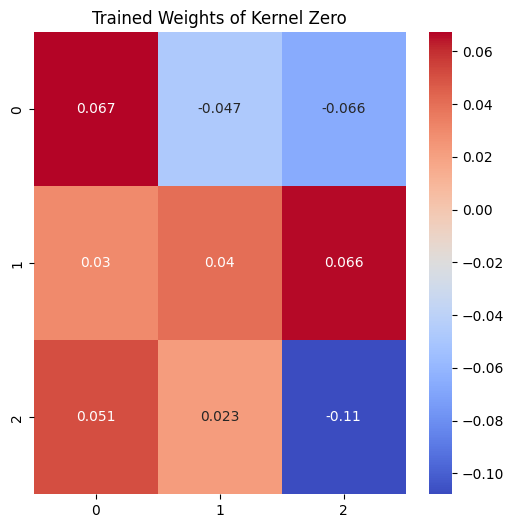

In [13]:
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()
final_kernel = model_convDense.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Trained Weights of Kernel Zero')

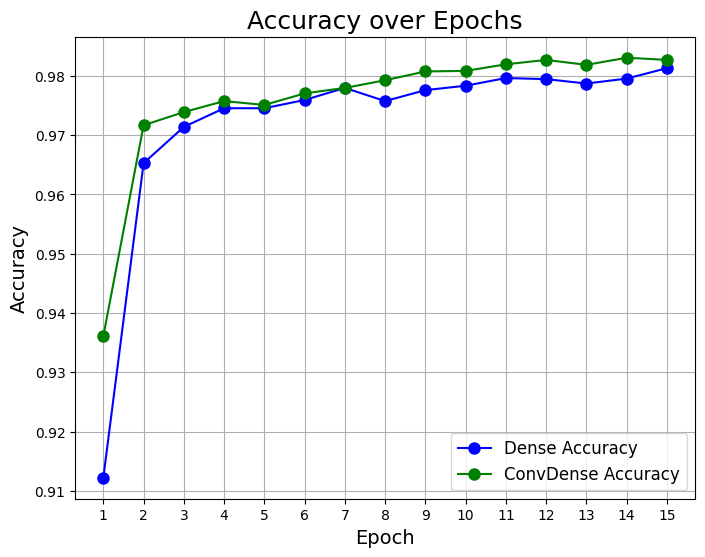

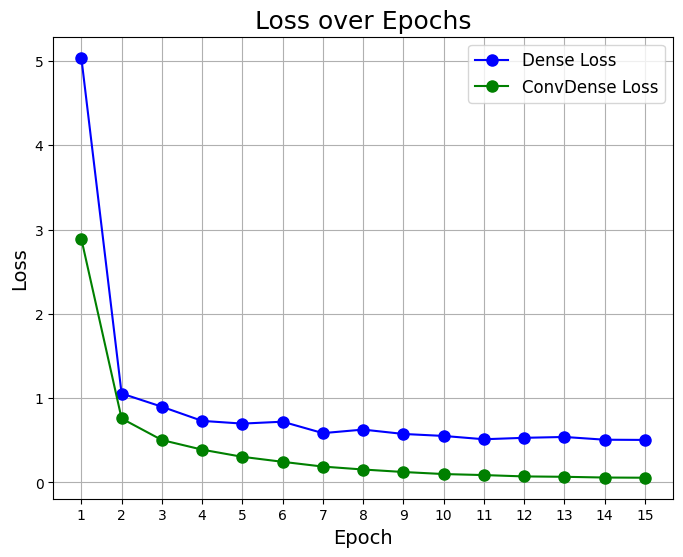

In [14]:
dense_history_dict = history_dense.history
conv_dense_history_dict = history_convDense.history
dense_accuracy = dense_history_dict['accuracy']
conv_dense_accuracy = conv_dense_history_dict['accuracy']
dense_loss = dense_history_dict['loss']
conv_dense_loss = conv_dense_history_dict['loss']

epochs = range(1, len(dense_accuracy) + 1)

# accuracy
plt.figure(figsize=(8, 6))  
plt.plot(epochs, dense_accuracy, 'bo-', label='Dense Accuracy', markersize=8)
plt.plot(epochs, conv_dense_accuracy, 'go-', label='ConvDense Accuracy', markersize=8)
plt.title('Accuracy over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(ticks=epochs)
plt.savefig("results/zero_accuracy_plot.png", bbox_inches='tight', dpi=1000 )
plt.show()
plt.close()

# loss
plt.figure(figsize=(8, 6))  # Larger figure for better clarity
plt.plot(epochs, dense_loss, 'bo-', label='Dense Loss', markersize=8)
plt.plot(epochs, conv_dense_loss, 'go-', label='ConvDense Loss', markersize=8)
plt.title('Loss over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(ticks=epochs)
plt.savefig("results/zero_loss_plot.png", bbox_inches='tight', dpi=1000)
plt.show()
plt.close()
